In [0]:

from zipfile import ZipFile

In [0]:

3
4
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/drive/My Drive/DL Projects/digit recognizer/digit-recognizer.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/drive/My Drive/DL Projects/digit recognizer/')

In [1]:
%%time
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


CPU times: user 1.72 s, sys: 377 ms, total: 2.1 s
Wall time: 6.6 s


In [0]:
import pandas as pd
import numpy as np

In [3]:
%%time
train = pd.read_csv("/content/drive/My Drive/DL Projects/digit recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/DL Projects/digit recognizer/test.csv")

CPU times: user 4.77 s, sys: 537 ms, total: 5.31 s
Wall time: 5.6 s


In [7]:
train.head(4)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_X = train.drop(labels = ["label"],axis = 1)
train_Y = train["label"]

In [18]:
train_X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_X = train_X / 255.0
test = test / 255.0
train_X = train_X.values.reshape(-1,28,28,1)

In [0]:
test = test.values.reshape(-1,28,28,1)

In [0]:
train_Y.shape

In [7]:
%%time
num_classes = len(np.unique(train_Y))
train_Y = to_categorical(train_Y,num_classes)

CPU times: user 2.59 ms, sys: 819 µs, total: 3.41 ms
Wall time: 3.2 ms


In [0]:
import matplotlib.pyplot as plt


In [9]:
%%time
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_Y,test_size = 0.2,random_state=2)

CPU times: user 384 ms, sys: 52.8 ms, total: 437 ms
Wall time: 449 ms


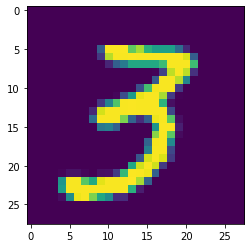

In [10]:
plt.imshow(X_train[1][:,:,0])

In [11]:
%%time
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import  Flatten
from tensorflow.keras.layers import  Convolution2D
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.layers import  Activation

CPU times: user 1.55 ms, sys: 927 µs, total: 2.48 ms
Wall time: 1.99 ms


In [12]:
%%time
model = Sequential()


model.add(Convolution2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28,28,1)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
CPU times: user 216 ms, sys: 3.03 ms, total: 219 ms
Wall time: 249 ms


In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2

In [0]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset\n",
            samplewise_center=False,  # set each sample mean to 0\n",
            featurewise_std_normalization=False,  # divide inputs by std of the dataset\n",
            samplewise_std_normalization=False,  # divide each input by its std\n",
            zca_whitening=False,  # apply ZCA whitening\n",
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)\n",
            zoom_range = 0.1, # Randomly zoom image \n",
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)\n",
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)\n",
            horizontal_flip=False,  # randomly flip images\n",
            vertical_flip=False)  # randomly flip images
        

In [0]:
datagen.fit(X_train)

In [16]:
%%time
model.fit_generator(datagen.flow(X_train,Y_train,batch_size = 86), epochs = 2, validation_data = (X_test,Y_test), steps_per_epoch = X_train.shape[0])

Epoch 1/2
33600/33600 [==============================] - 1306s 39ms/step - loss: 0.0380 - acc: 0.9885 - val_loss: 0.0270 - val_acc: 0.9942
Epoch 2/2
33600/33600 [==============================] - 1281s 38ms/step - loss: 0.0199 - acc: 0.9943 - val_loss: 0.0264 - val_acc: 0.9948
CPU times: user 53min 50s, sys: 5min 15s, total: 59min 6s
Wall time: 43min 14s


In [0]:
model.save("digit-recognizer.h5")

In [0]:
import imageio

0


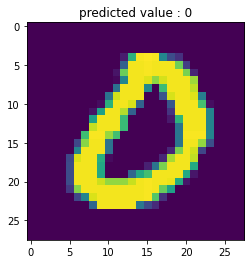

3


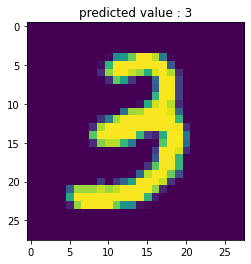

0


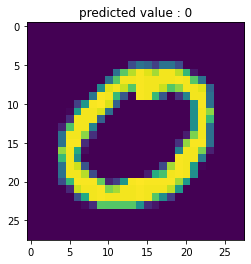

3


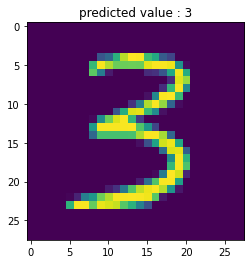

5


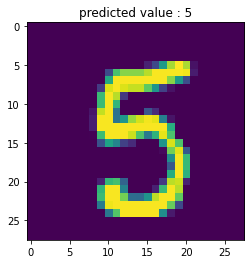

7


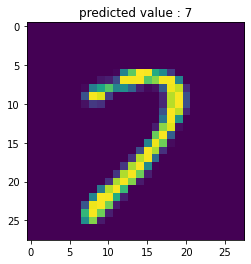

In [115]:
testing = test[6:12,:]
for i,img in enumerate(testing):
    im = img[:,:,0]
    n = image.img_to_array(im)
    n = np.expand_dims(n.copy(), axis=0)
    preds = model.predict(n)
    j = preds.argmax(axis=1)[0]
    print(j)
    # cv2_imshow(im)
    plt.title("predicted value : %s" % j)
    plt.imshow(im)
    plt.show()